In [1]:
# wine_dim_reduction.py (cells in Jupyter)
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# 1. Load dataset - expects wine.data or wine.csv in same directory
# If you have original wine.data (space/comma separated), convert or load accordingly.
# The UCI wine dataset (first column = class 1-3, following 13 features)

# Try common filenames

df = pd.read_csv('wine.data', header=None)


# If headerless, columns 0..13 -> first col is class
if df.shape[1] == 14:
    cols = ['class'] + [f'f{i}' for i in range(1,14)]
    df.columns = cols
else:
    # try if there is header row
    if 'class' not in df.columns and df.shape[1] >= 14:
        df = df.iloc[:, :14]
        cols = ['class'] + [f'f{i}' for i in range(1,14)]
        df.columns = cols

X = df.drop(columns=['class']).values.astype(float)
y = df['class'].values.astype(int)

# 2. Standardize
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# #normalize
# Xs = Xs / np.linalg.norm(Xs, axis=1, keepdims=True)

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs)
print('PCA explained variance ratio:', pca.explained_variance_ratio_)



PCA explained variance ratio: [0.36198848 0.1920749 ]


In [15]:
# 4. t-SNE (slow for large data, fine here)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(Xs)



In [16]:
# 5. UMAP
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(Xs)



C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved reduced_pca.csv, reduced_tsne.csv, reduced_umap.csv


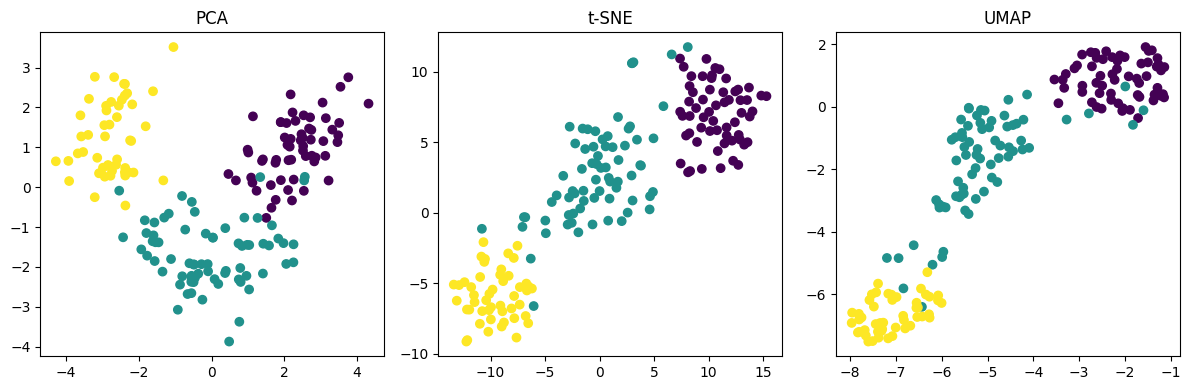

In [13]:
# 6. Save reduced arrays for frontend
out_pca = pd.DataFrame({'idx': np.arange(len(X_pca)), 'x': X_pca[:,0], 'y': X_pca[:,1], 'class': y})
out_tsne = pd.DataFrame({'idx': np.arange(len(X_tsne)), 'x': X_tsne[:,0], 'y': X_tsne[:,1], 'class': y})
out_umap = pd.DataFrame({'idx': np.arange(len(X_umap)), 'x': X_umap[:,0], 'y': X_umap[:,1], 'class': y})

out_pca.to_csv('reduced_pca.csv', index=False)
out_tsne.to_csv('reduced_tsne.csv', index=False)
out_umap.to_csv('reduced_umap.csv', index=False)

print('Saved reduced_pca.csv, reduced_tsne.csv, reduced_umap.csv')

# 7. Optional quick plots for sanity
fig, axs = plt.subplots(1,3, figsize=(12,4))
for ax, arr, title in zip(axs, [X_pca, X_tsne, X_umap], ['PCA','t-SNE','UMAP']):
    scatter = ax.scatter(arr[:,0], arr[:,1], c=y, cmap='viridis')
    ax.set_title(title)
plt.tight_layout()
plt.show()